## Plots

Plots for all the 

In [37]:
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 1000)

In [213]:
gnn_models = ['GCN','RGCN','RGAT']
embedding_plain = {'complex': 'ComplEx',
                   'distmult': 'DistMult',
                   'transe': 'TransE',
                   'roberta': 'RoBERTa',
                   'gpt2':'GPT2'
                   }

embedding_combined = { 'distmult+RoBERTa':'DistMult+RoBERTa',
                      'transe+RoBERTa': 'TransE+RoBERTa',
                      'complex+RoBERTa' : 'ComplEx+RoBERTa',
                      'distmult+GPT2':'DistMult+GPT2',
                      'transe+GPT2': 'TransE+GPT2',
                      'complex+GPT2' : 'ComplEx+GPT2'
        
}
all_embeddings = {**embedding_combined,**embedding_plain, }

embedding_types = [embedding_plain, embedding_combined]
hit_metrics = ['hits@1', 'hits@3', 'hits@5']
FPR_metrics = ['F1', 'precision', 'recall']


METRICS = {'Hits@k': hit_metrics, 'F1-Precision-Recall': FPR_metrics}

VADQA_datasets = ['VAD-QA']
MetaQA_datasets = ['1-hop','2-hop']


HIT_BAR_COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c']
FPR_BAR_COLORS = ['#d62728', '#9467bd', '#8c564b']

### VAD-QA

In [224]:
# read experiment metadata
exp_metadata = pd.read_csv('./core/experiments/qa/qa_experiments_masterdata.csv')
exp_metadata[['time_stamp', 'Epochs', 'Learning Rate', 'hidden_dimension',
       'num_layers', 'num_bases', 'Model', 'hits@1', 'hits@3', 'hits@5', 'mrr', 'precision@1', 'precision@3', 'precision@5', 'recall@1', 'recall@3',
       'recall@5']].tail(2)
len(exp_metadata)

33

In [225]:
cols = ['info', 'Model','Epochs', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']
VAD_QA_results = exp_metadata[cols].copy()
#VAD_QA_results

In [226]:
VAD_QA_results['dataset_type'] = 'VAD-QA'
VAD_QA_results['model_name'] = VAD_QA_results['Model'].str.split('(').str[0]
VAD_QA_results['model_name'] = VAD_QA_results['model_name'].str.strip()
VAD_QA_results['embedding_type'] = VAD_QA_results['info'].str.split().str[-1]
VAD_QA_results[['info','embedding_type','model_name']].tail()

,info,embedding_type,model_name
28,Task: QA with RGCN; node embeddings initialized with distmult+GPT2,distmult+GPT2,RGCN
29,Task: QA with RGCN; node embeddings initialized with transe+GPT2,transe+GPT2,RGCN
30,Task: QA with RGAT; node embeddings initialized with complex+GPT2,complex+GPT2,RGAT
31,Task: QA with RGAT; node embeddings initialized with distmult+GPT2,distmult+GPT2,RGAT
32,Task: QA with RGAT; node embeddings initialized with transe+GPT2,transe+GPT2,RGAT


In [227]:
vadqa_exp_data = VAD_QA_results[['model_name','embedding_type', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']].copy()

In [221]:
models_name_mapping = {'GCN':'GCN','RGCN':'R-GCN','RGAT':'R-GAT'}

In [228]:
vadqa_exp_data = vadqa_exp_data.sort_values(by=['model_name','embedding_type'])
vadqa_exp_data[['F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']] = vadqa_exp_data[['F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']].round(2)
vadqa_exp_data['embedding_type'] = vadqa_exp_data['embedding_type'].map(all_embeddings)
vadqa_exp_data['model_name'] = vadqa_exp_data['model_name'].map(models_name_mapping)
vadqa_exp_data


,model_name,embedding_type,F1,precision,recall,hits@1,hits@3,hits@5,mrr
0,GCN,ComplEx,0.28,0.21,0.80,0.62,0.72,0.76,0.64
24,GCN,ComplEx+GPT2,0.28,0.21,0.80,0.40,0.66,0.71,0.50
9,GCN,ComplEx+RoBERTa,0.20,0.14,0.73,0.52,0.65,0.68,0.56
1,GCN,DistMult,0.24,0.18,0.72,0.59,0.68,0.71,0.61
25,GCN,DistMult+GPT2,0.31,0.23,0.82,0.49,0.73,0.76,0.59
10,GCN,DistMult+RoBERTa,0.26,0.19,0.80,0.41,0.64,0.71,0.51
21,GCN,GPT2,0.17,0.11,0.64,0.28,0.40,0.55,0.35
20,GCN,RoBERTa,0.17,0.11,0.76,0.32,0.48,0.61,0.40
2,GCN,TransE,0.27,0.20,0.78,0.43,0.62,0.68,0.49
26,GCN,TransE+GPT2,0.22,0.17,0.68,0.36,0.57,0.63,0.45


In [230]:
columns_to_format = vadqa_exp_data.columns
formatted_df = pd.DataFrame()
for col in columns_to_format[:-1]:
    formatted_df[col] = vadqa_exp_data[col].astype(str) + ' & '
formatted_df[columns_to_format[-1]] = vadqa_exp_data[columns_to_format[-1]].astype(str) + ' \\\\'
formatted_df.to_clipboard(index=False)

In [209]:
def vadqa_bar_plot_func(gnn_model:str,metric_type:str, embedding_type:dict,dataset_type, results:pd.DataFrame,subplot):

    df = results[(results['dataset_type']==dataset_type) & (results['model_name']==gnn_model)].copy()
    df = df[df['embedding_type'].isin(embedding_type.keys())]
    
    grouped = df[['embedding_type'] + METRICS[metric_type]].groupby('embedding_type').mean().reset_index()

    
    x_labels = grouped['embedding_type'].map(embedding_type)
    x = np.arange(len(x_labels))
    bar_width = 0.15
    i = 0
    ax = plt.subplot(subplot)
    
    if metric_type =='Hits@k':
        bar_colors = HIT_BAR_COLORS
    else:
        bar_colors = FPR_BAR_COLORS
    for metric,bar_color in  zip(METRICS[metric_type],bar_colors):
        plt.bar(x + i*bar_width , grouped[metric], width=bar_width,label=metric, color=bar_color )

        if metric=='hits@5' or metric=='F1':

            for j, value in enumerate(grouped[metric]):
                plt.text(x[j] + i * bar_width, value+0.02, f'{value:.2f}', ha='center', va='bottom', rotation=90)
        i+=1

    # Customize the plot
    plt.xlabel('Embedding Type')
    plt.ylabel(f'{metric_type}')
    plt.ylim(0, 1.2)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xticks(x+bar_width, x_labels, rotation=0)
    plt.title(f'{gnn_model} Evaluation on {dataset_type}')
    plt.grid(axis='y')
    plt.legend(ncol=len(METRICS[metric_type]), fontsize='small', frameon=False)
    

### MetaQA

In [212]:
def metaqa_bar_plot_func(gnn_model:str,metric_type:str, embedding_type:dict,dataset_type, results:pd.DataFrame,subplot):

    df = results[(results['dataset_type']==dataset_type) & (results['model_name']==gnn_model)].copy()
    df = df[df['embedding_type'].isin(embedding_type.keys())]
    
    grouped = df[['embedding_type'] + METRICS[metric_type]].groupby('embedding_type').mean().reset_index()

    
    x_labels = grouped['embedding_type'].map(embedding_type)
    x = np.arange(len(x_labels))
    bar_width = 0.1
    i = 0
    ax = plt.subplot(subplot)

    if metric_type =='Hits@k':
        bar_colors = HIT_BAR_COLORS
    else:
        bar_colors = FPR_BAR_COLORS
    for metric,bar_color in  zip(METRICS[metric_type],bar_colors):
        plt.bar(x + i*bar_width,
                grouped[metric],
                width=bar_width,
                label=metric,
                color=bar_color
                )
        if metric=='hits@5' or metric=='F1':

            for j, value in enumerate(grouped[metric]):
                plt.text(x[j] + i * bar_width, value, f'{value:.2f}', ha='center', va='bottom', rotation=90)
        i+=1

    # Customize the plot
    plt.xlabel('Embedding Type')
    plt.ylabel(f'{metric_type} Score')
    plt.ylim(0, 1.2)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xticks(x+bar_width, x_labels, rotation=45)
    plt.title(f'{gnn_model} Evaluation on {dataset_type} MetaQA')
    plt.grid(axis='y')
    plt.legend(ncol=len(METRICS[metric_type]), fontsize='small', frameon=False)
    

In [ ]:
# read experiment metadata
MetaQA_exp_metadata = pd.read_csv('./core/experiments/qa/MetaQA_experiments_masterdata.csv')
MetaQA_exp_metadata[['time_stamp', 'Epochs', 'Learning Rate', 'hidden_dimension',
       'num_layers', 'num_bases', 'Model', 'hits@1', 'hits@3', 'hits@5', 'mrr', 'precision@1', 'precision@3', 'precision@5', 'recall@1', 'recall@3',
       'recall@5']].tail(2)
len(MetaQA_exp_metadata)

MetaQA_1_hop_dataset_mask = MetaQA_exp_metadata['info'].str.contains('1-hop')
MetaQA_2_hop_dataset_mask = MetaQA_exp_metadata['info'].str.contains('2-hop')
len(MetaQA_exp_metadata[MetaQA_2_hop_dataset_mask])

MetaQA_exp_metadata.loc[MetaQA_2_hop_dataset_mask,'dataset_type'] = '2-hop'
MetaQA_exp_metadata.loc[MetaQA_1_hop_dataset_mask,'dataset_type'] = '1-hop'
MetaQA_exp_metadata['model_name'] = MetaQA_exp_metadata['Model'].str.split('(').str[0]
MetaQA_exp_metadata['model_name'] = MetaQA_exp_metadata['model_name'].str.strip()
MetaQA_exp_metadata['embedding_type'] = MetaQA_exp_metadata['info'].str.split().str[-1]
MetaQA_exp_metadata[['info','embedding_type','model_name', 'dataset_type']].tail()

In [249]:
MetaQA_exp_data = MetaQA_exp_metadata[['model_name','embedding_type', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr','dataset_type']].copy()
MetaQA_exp_data = MetaQA_exp_data[['dataset_type','model_name','embedding_type', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']][MetaQA_exp_data['dataset_type']=='2-hop'].copy()
col = ['model_name','embedding_type', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']
MetaQA_exp_data = MetaQA_exp_data[col].sort_values(by=['model_name','embedding_type'])
MetaQA_exp_data[['F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']] = MetaQA_exp_data[['F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']].round(2)
MetaQA_exp_data['embedding_type'] = MetaQA_exp_data['embedding_type'].map(all_embeddings)
MetaQA_exp_data['model_name'] = MetaQA_exp_data['model_name'].map(models_name_mapping)
MetaQA_exp_data.columns
columns_to_format = MetaQA_exp_data.columns
formatted_df = pd.DataFrame()
for col in columns_to_format[:-1]:
    formatted_df[col] = MetaQA_exp_data[col].astype(str) + ' & '
formatted_df[columns_to_format[-1]] = MetaQA_exp_data[columns_to_format[-1]].astype(str) + ' \\\\'
formatted_df.to_clipboard(index=False)
formatted_df.tail()







,model_name,embedding_type,F1,precision,recall,hits@1,hits@3,hits@5,mrr
48,R-GCN &,GPT2 &,0.33 &,0.22 &,1.0 &,0.28 &,0.58 &,0.75 &,0.37 \\
27,R-GCN &,RoBERTa &,0.35 &,0.23 &,1.0 &,0.28 &,0.6 &,0.76 &,0.36 \\
26,R-GCN &,TransE &,0.31 &,0.2 &,1.0 &,0.27 &,0.59 &,0.75 &,0.34 \\
64,R-GCN &,TransE+GPT2 &,0.32 &,0.21 &,1.0 &,0.28 &,0.52 &,0.7 &,0.33 \\
37,R-GCN &,TransE+RoBERTa &,0.33 &,0.21 &,1.0 &,0.28 &,0.58 &,0.75 &,0.34 \\


In [239]:
MetaQA_exp_data = MetaQA_exp_metadata[['model_name','embedding_type', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr','dataset_type']].copy()
MetaQA_exp_data = MetaQA_exp_data[['model_name','embedding_type', 'F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']][MetaQA_exp_data['dataset_type']=='1-hop'].copy()
MetaQA_exp_data = MetaQA_exp_data.sort_values(by=['model_name','embedding_type'])
MetaQA_exp_data[['F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']] = MetaQA_exp_data[['F1', 'precision', 'recall', 'hits@1', 'hits@3', 'hits@5', 'mrr']].round(2)
MetaQA_exp_data['embedding_type'] = MetaQA_exp_data['embedding_type'].map(all_embeddings)
MetaQA_exp_data['model_name'] = MetaQA_exp_data['model_name'].map(models_name_mapping)
columns_to_format = MetaQA_exp_data.columns
formatted_df = pd.DataFrame()
for col in columns_to_format[:-1]:
    formatted_df[col] = MetaQA_exp_data[col].astype(str) + ' & '
formatted_df[columns_to_format[-1]] = vadqa_exp_data[columns_to_format[-1]].astype(str) + ' \\\\'
formatted_df.to_clipboard(index=False)
formatted_df.tail()

,model_name,embedding_type,F1,precision,recall,hits@1,hits@3,hits@5,mrr
45,R-GCN &,GPT2 &,0.36 &,0.31 &,1.0 &,0.47 &,0.67 &,0.82 &,NaN
42,R-GCN &,RoBERTa &,0.35 &,0.31 &,1.0 &,0.48 &,0.71 &,0.85 &,NaN
7,R-GCN &,TransE &,0.36 &,0.3 &,0.98 &,0.4 &,0.66 &,0.83 &,0.71 \\
55,R-GCN &,TransE+GPT2 &,0.34 &,0.28 &,0.96 &,0.38 &,0.68 &,0.82 &,NaN
16,R-GCN &,TransE+RoBERTa &,0.36 &,0.31 &,1.0 &,0.43 &,0.69 &,0.8 &,0.81 \\


### RQ1&2

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\2223660854.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


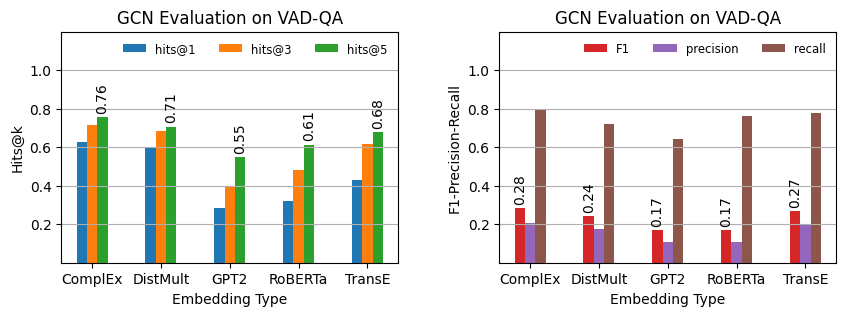

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\2223660854.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


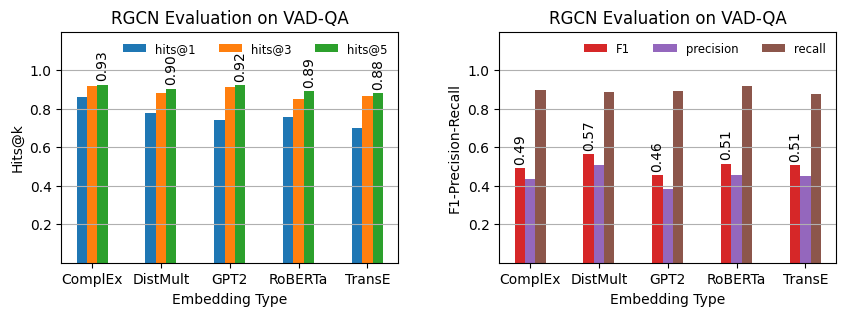

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\2223660854.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


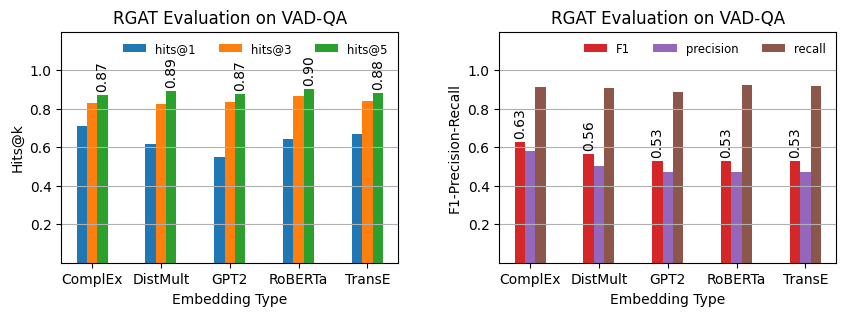

In [210]:
for dataset in VADQA_datasets:
        for model in gnn_models:

            # Create a figure with two subplots
            subplot_size = (5, 3)  # Width x Height
            fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
            vadqa_bar_plot_func(gnn_model = model, metric_type='Hits@k', embedding_type= embedding_plain,dataset_type=dataset,
                           results=VAD_QA_results,subplot=gs[0])
            vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall', embedding_type= embedding_plain,dataset_type=dataset,
                           results=VAD_QA_results,subplot=gs[1])
            plt.tight_layout()
            plt.show()


C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\1754062444.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


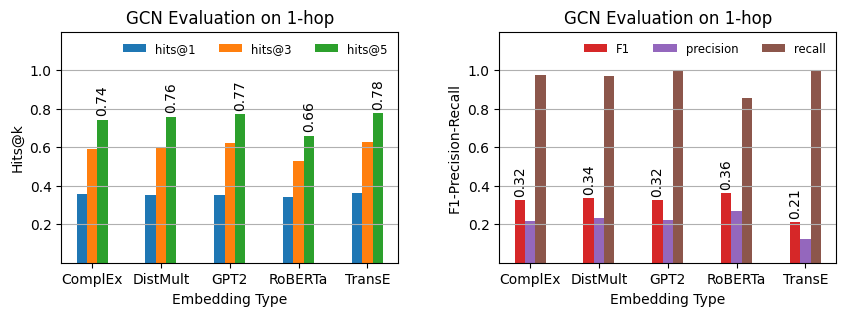

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\1754062444.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


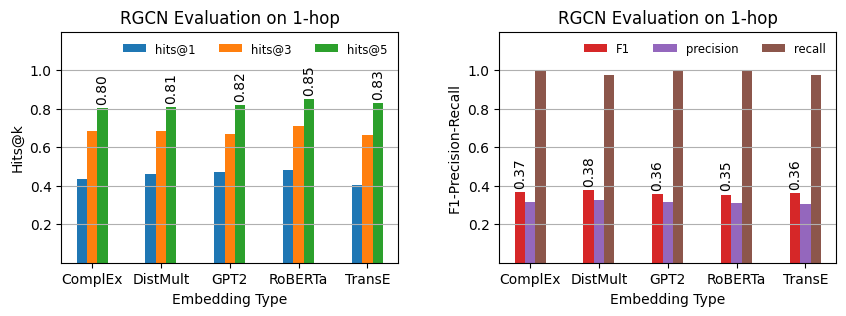

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\1754062444.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


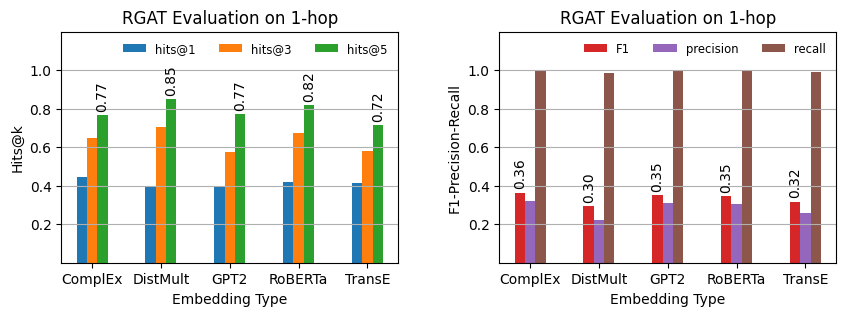

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\1754062444.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


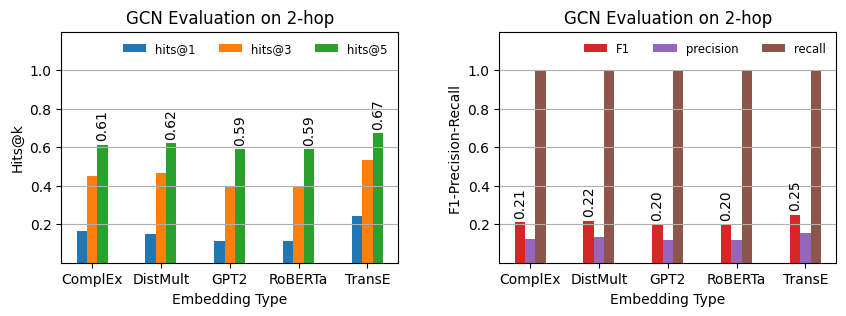

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\1754062444.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


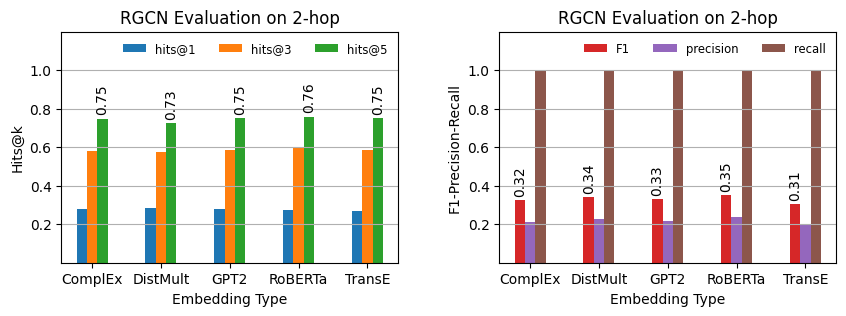

C:\Users\I583773\AppData\Local\Temp\ipykernel_12188\1754062444.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


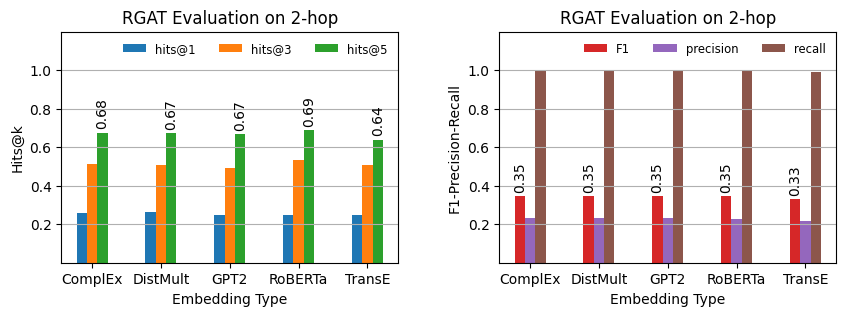

In [214]:
for dataset in MetaQA_datasets:
        for model in gnn_models:

            # Create a figure with two subplots
            subplot_size = (5, 3)  # Width x Height
            fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
            vadqa_bar_plot_func(gnn_model = model, metric_type='Hits@k', embedding_type= embedding_plain,dataset_type=dataset,
                           results=MetaQA_exp_metadata,subplot=gs[0])
            vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall', embedding_type= embedding_plain,dataset_type=dataset,
                           results=MetaQA_exp_metadata,subplot=gs[1])
            plt.tight_layout()
            plt.show()

### RQ3

In [189]:
gnn_models = ['GCN','RGCN','RGAT']
rq3_embedding_plain = {
                    'complex': 'ComplEx',
                    'complex+RoBERTa' : 'ComplEx+\nRoBERTa',
                    'complex+GPT2' : 'ComplEx+\nGPT2',
                    'distmult': 'DistMult',
                    'distmult+RoBERTa':'DistMult+\nRoBERTa',
                    'distmult+GPT2':'DistMult+\nGPT2',
                    'transe': 'TransE',
                    'transe+RoBERTa': 'TransE+\nRoBERTa',
                    'transe+GPT2': 'TransE+\nGPT2',   
                   }

rq3_embedding_types = [rq3_embedding_plain]
rq3_F1_hit_metrics = ['hits@5','F1']


rq3_METRICS = {'Score': rq3_F1_hit_metrics}

VADQA_datasets = ['VAD-QA']
MetaQA_datasets = ['1-hop','2-hop']


rq3_HIT_BAR_COLORS = ['#1f77b4','#d62728']

In [185]:
def RQ3_bar_plot_func(gnn_model:str,metric_type:str, embedding_type:dict,dataset_type, results:pd.DataFrame):

    df = results[(results['dataset_type']==dataset_type) & (results['model_name']==gnn_model)].copy()
    df = df[df['embedding_type'].isin(embedding_type.keys())]
    
    grouped = df[['embedding_type'] + rq3_METRICS[metric_type]].groupby('embedding_type').mean().reset_index()

    
    x_labels = grouped['embedding_type'].map(embedding_type)
    x = np.arange(len(x_labels))
    bar_width = 0.2
    i = 0
    
    bar_colors = rq3_HIT_BAR_COLORS

    for metric,bar_color in  zip(rq3_METRICS[metric_type],bar_colors):
        plt.bar(x + i*bar_width , grouped[metric], width=bar_width,label=metric, color=bar_color )

        if metric=='hits@5' or metric=='F1':

            for j, value in enumerate(grouped[metric]):
                plt.text(x[j] + i * bar_width, value+0.02, f'{value:.2f}', ha='center', va='bottom', rotation=90)
        i+=1

    # Customize the plot
    plt.xlabel('Embedding Type')
    plt.ylabel(f'{metric_type}')
    plt.ylim(0, 1.2)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xticks(x+(bar_width/2), x_labels, rotation=0)
    plt.title(f'{gnn_model} Evaluation on {dataset_type}')
    plt.grid(axis='y')
    plt.legend(ncol=len(METRICS[metric_type]), fontsize='small', frameon=False)
    

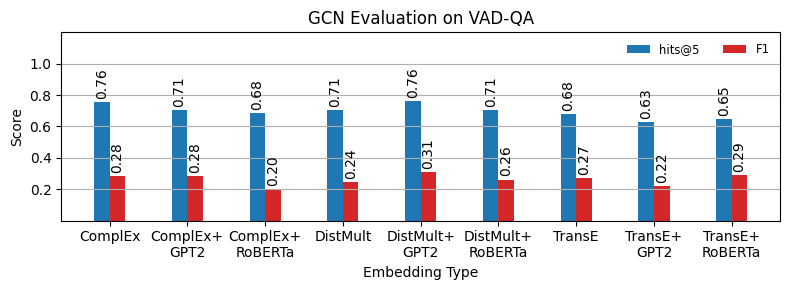

In [193]:
plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='GCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='VAD-QA',
                        results=VAD_QA_results)
plt.tight_layout()

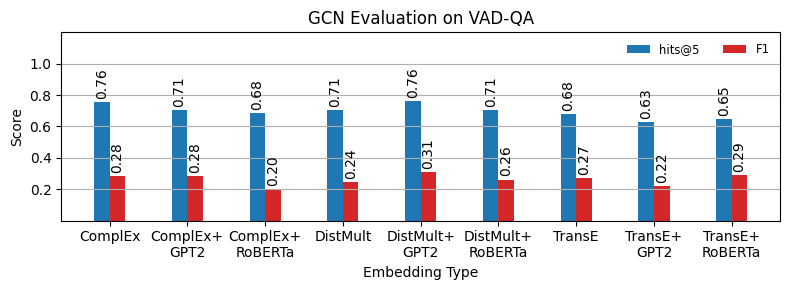

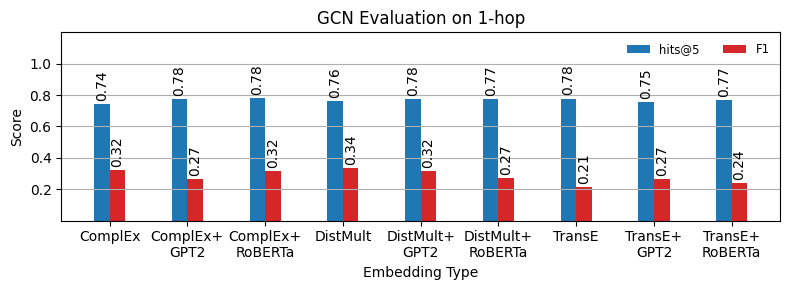

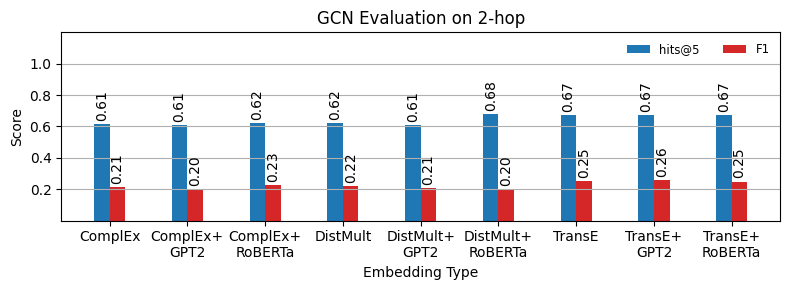

In [194]:
plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='GCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='VAD-QA',
                        results=VAD_QA_results)
plt.tight_layout()
plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='GCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='1-hop',
                        results=MetaQA_exp_metadata)
plt.tight_layout()
plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='GCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='2-hop',
                        results=MetaQA_exp_metadata)
plt.tight_layout()

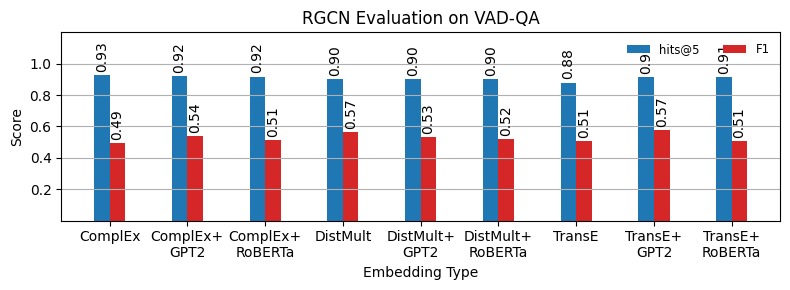

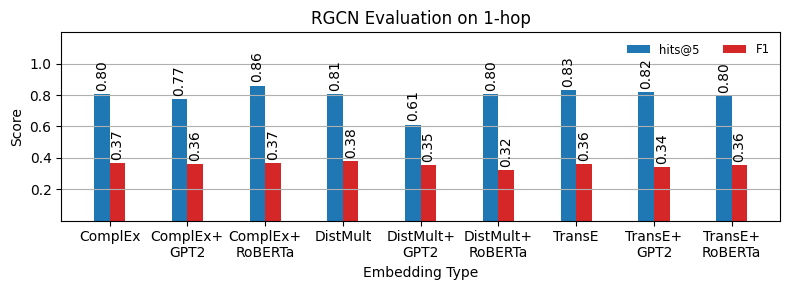

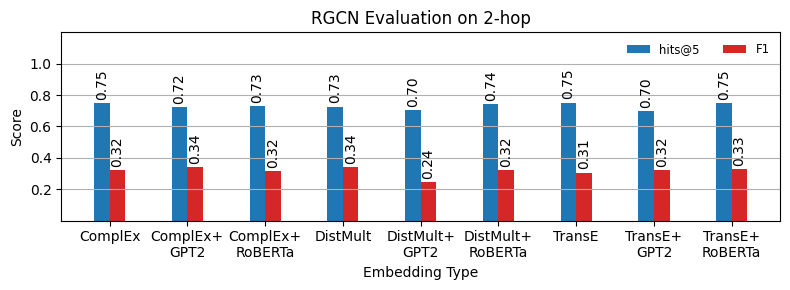

In [197]:
plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='RGCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='VAD-QA',
                        results=VAD_QA_results)

plt.tight_layout()

plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='RGCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='1-hop',
                        results=MetaQA_exp_metadata)
plt.tight_layout()

plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='RGCN',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='2-hop',
                        results=MetaQA_exp_metadata)
plt.tight_layout()

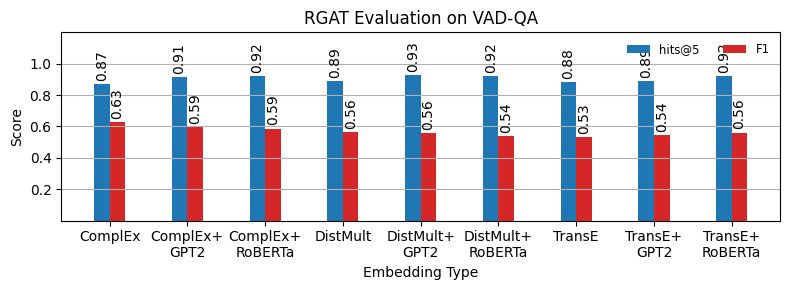

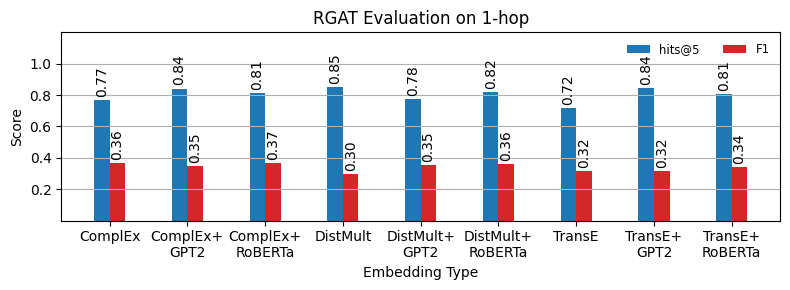

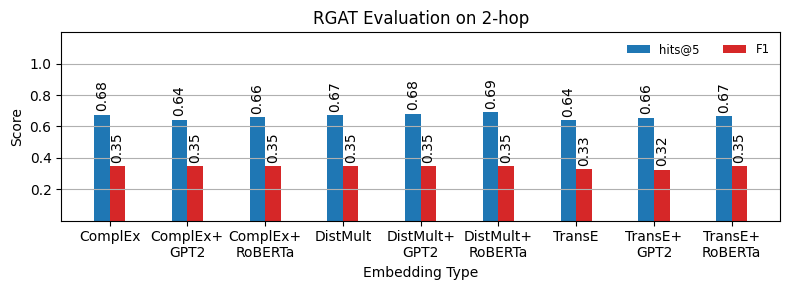

In [198]:
plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='RGAT',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='VAD-QA',
                        results=VAD_QA_results)
plt.tight_layout()

plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='RGAT',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='1-hop',
                        results=MetaQA_exp_metadata)
plt.tight_layout()

plt.figure(figsize=(8,3))
RQ3_bar_plot_func(gnn_model='RGAT',
                        metric_type='Score',
                        embedding_type=rq3_embedding_plain,
                        dataset_type='2-hop',
                        results=MetaQA_exp_metadata)
plt.tight_layout()

In [58]:
def metaqa_bar_plot_func(gnn_model:str,metric_type:str, embedding_type:dict,dataset_type, results:pd.DataFrame,subplot):

    df = results[(results['dataset_type']==dataset_type) & (results['model_name']==gnn_model)].copy()
    df = df[df['embedding_type'].isin(embedding_type.keys())]
    
    grouped = df[['embedding_type'] + METRICS[metric_type]].groupby('embedding_type').mean().reset_index()

    
    x_labels = grouped['embedding_type'].map(embedding_type)
    x = np.arange(len(x_labels))
    bar_width = 0.1
    i = 0
    ax = plt.subplot(subplot)

    if metric_type =='Hits@k':
        bar_colors = HIT_BAR_COLORS
    else:
        bar_colors = FPR_BAR_COLORS
    for metric,bar_color in  zip(METRICS[metric_type],bar_colors):
        plt.bar(x + i*bar_width,
                grouped[metric],
                width=bar_width,
                label=metric,
                color=bar_color
                )
        if metric=='hits@5' or metric=='F1':

            for j, value in enumerate(grouped[metric]):
                plt.text(x[j] + i * bar_width, value, f'{value:.2f}', ha='center', va='bottom', rotation=90)
        i+=1

    # Customize the plot
    plt.xlabel('Embedding Type')
    plt.ylabel(f'{metric_type} Score')
    plt.ylim(0, 1.2)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xticks(x+bar_width, x_labels, rotation=45)
    plt.title(f'{gnn_model} Evaluation on {dataset_type} MetaQA')
    plt.grid(axis='y')
    plt.legend(ncol=len(METRICS[metric_type]), fontsize='small', frameon=False)
    

68

33

,info,embedding_type,model_name,dataset_type
63,Task: 2-hop MetaQA with RGCN; node embeddings initialized with distmult+GPT2,distmult+GPT2,RGCN,2-hop
64,Task: 2-hop MetaQA with RGCN; node embeddings initialized with transe+GPT2,transe+GPT2,RGCN,2-hop
65,Task: 2-hop MetaQA with RGAT; node embeddings initialized with complex+GPT2,complex+GPT2,RGAT,2-hop
66,Task: 2-hop MetaQA with RGAT; node embeddings initialized with distmult+GPT2,distmult+GPT2,RGAT,2-hop
67,Task: 2-hop MetaQA with RGAT; node embeddings initialized with transe+GPT2,transe+GPT2,RGAT,2-hop


### 1-Hop MetaQA

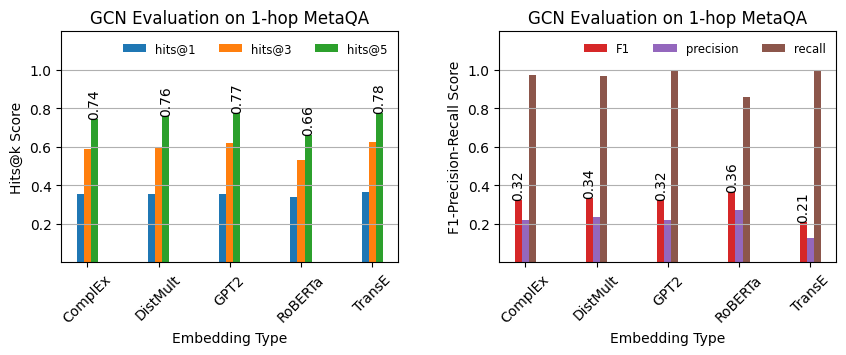

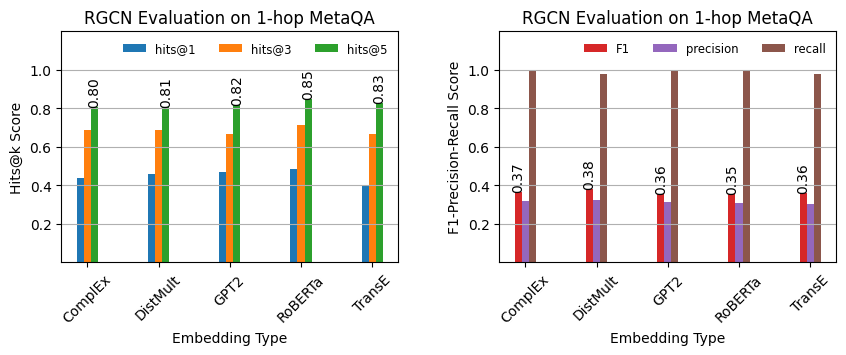

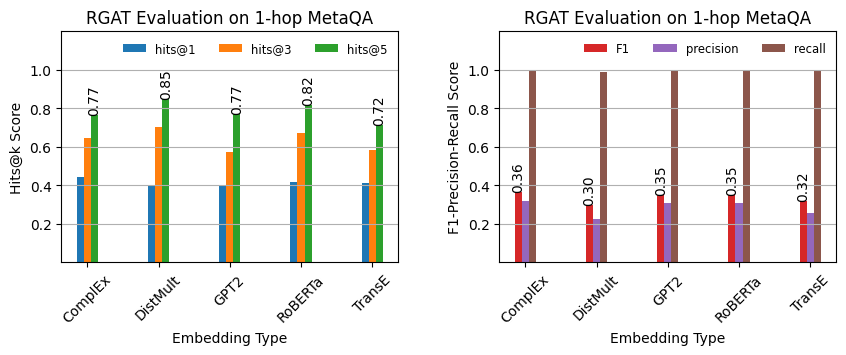

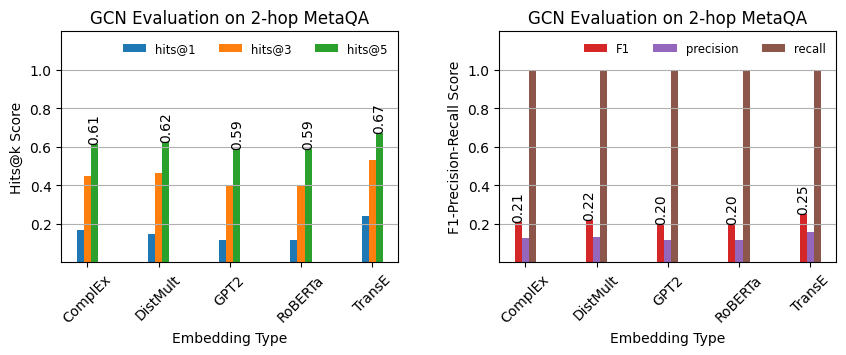

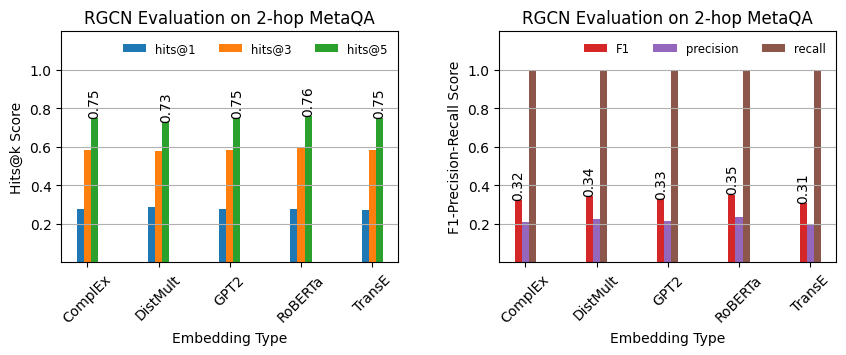

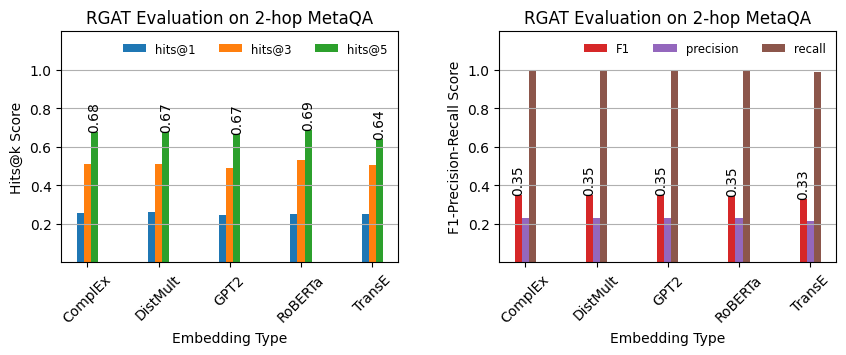

In [85]:
for dataset in MetaQA_datasets:
    for model in gnn_models:
        # Create a figure with two subplots
        subplot_size = (5, 3)  # Width x Height
        fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
        metaqa_bar_plot_func(gnn_model=model,
                            metric_type='Hits@k',
                            embedding_type=embedding_plain,
                            dataset_type=dataset,
                            results=MetaQA_exp_metadata,subplot=gs[0])
        metaqa_bar_plot_func(gnn_model=model,
                            metric_type='F1-Precision-Recall',
                            embedding_type= embedding_plain,
                            dataset_type=dataset,
                            results=MetaQA_exp_metadata,subplot=gs[1])
        #plt.tight_layout()
        plt.show()

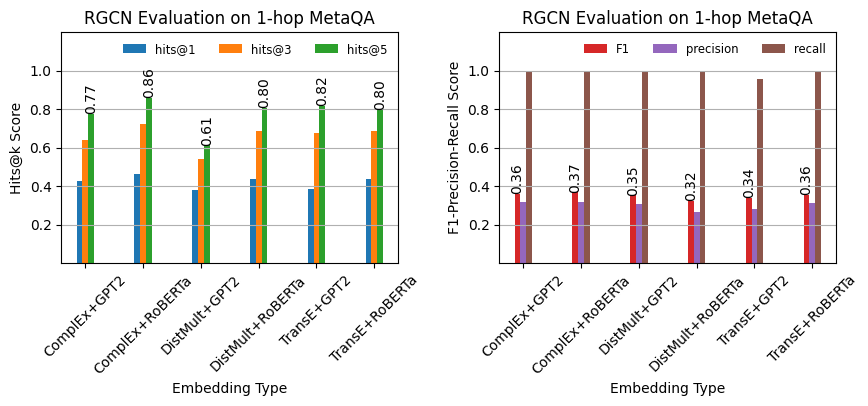

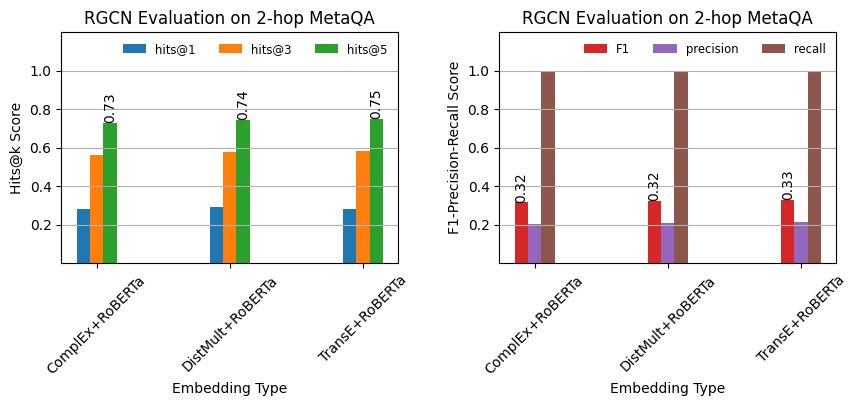

In [60]:
for dataset in MetaQA_datasets:
    # Create a figure with two subplots
    subplot_size = (5, 3)  # Width x Height
    fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
    metaqa_bar_plot_func(gnn_model='RGCN',
                        metric_type='Hits@k',
                        embedding_type=embedding_combined,
                        dataset_type=dataset,
                        results=MetaQA_exp_metadata,subplot=gs[0])
    metaqa_bar_plot_func(gnn_model='RGCN',
                        metric_type='F1-Precision-Recall',
                        embedding_type= embedding_combined,
                        dataset_type=dataset,
                        results=MetaQA_exp_metadata,subplot=gs[1])
    #plt.tight_layout()
    plt.show()
    

In [397]:
embedding_plain

{'complex': 'ComplEx',
 'distmult': 'DistMult',
 'transe': 'TransE',
 'roberta': 'RoBERTa'}

In [14]:
embedding_combined

{'distmult+RoBERTa': 'DistMult+RoBERTa',
 'transe+RoBERTa': 'TransE+RoBERTa',
 'complex+RoBERTa': 'ComplEx+RoBERTa',
 'distmult+GPT2': 'DistMult+GPT2',
 'transe+GPT2': 'TransE+GPT2',
 'complex+GPT2': 'ComplEx+GPT2'}

In [21]:
embedding_complex_RoB = {
    'distmult': 'distMult',
    'roberta':'RoBERTa',
    'gpt2': 'GPT2',
    'distmult+GPT2': 'distMult+GPT2',
    'distmult+RoBERTa': 'distMult+RoBERTa'}

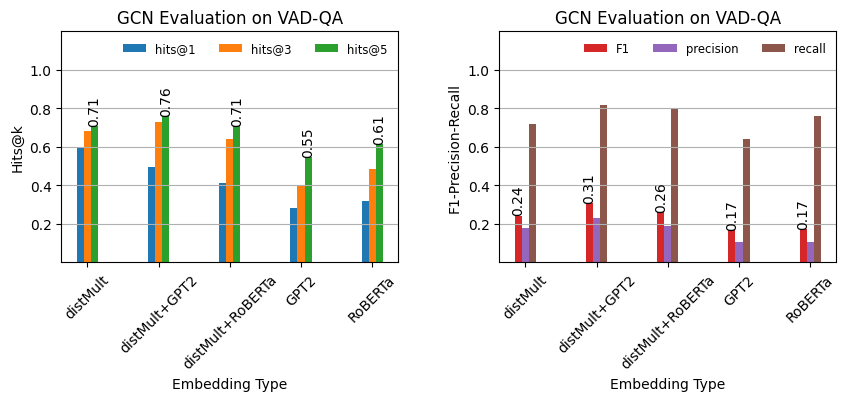

In [61]:
for dataset in VADQA_datasets:
    # Create a figure with two subplots
    subplot_size = (5, 3)  # Width x Height
    fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
    vadqa_bar_plot_func(gnn_model='GCN',
                        metric_type='Hits@k',
                        embedding_type=embedding_complex_RoB,
                        dataset_type=dataset,
                        results=VAD_QA_results,subplot=gs[0])
    vadqa_bar_plot_func(gnn_model='GCN',
                        metric_type='F1-Precision-Recall',
                        embedding_type= embedding_complex_RoB,
                        dataset_type=dataset,
                        results=VAD_QA_results,subplot=gs[1])
    #plt.tight_layout()
    plt.show()

In [23]:
embedding_complex_combined = {
    'complex': 'ComplEx',
    'roberta':'RoBERTa',
    'gpt2': 'GPT2',
    'complex+GPT2': 'ComplEx+GPT2',
    'complex+RoBERTa': 'ComplEx+RoBERTa'}

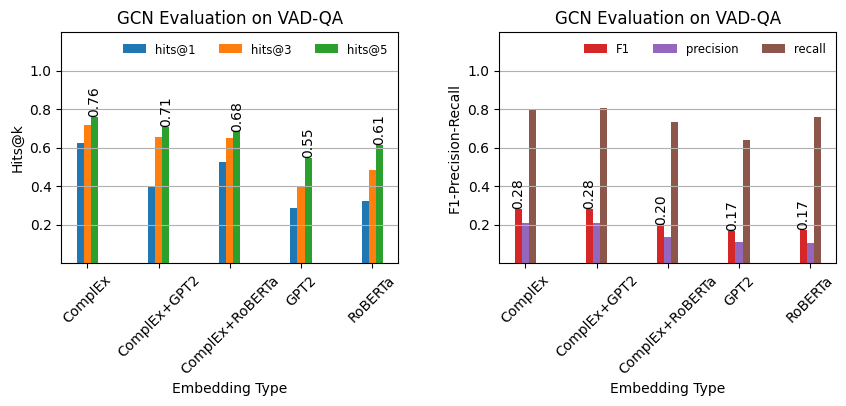

In [62]:
for dataset in VADQA_datasets:
    # Create a figure with two subplots
    subplot_size = (5, 3)  # Width x Height
    fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
    vadqa_bar_plot_func(gnn_model='GCN',
                        metric_type='Hits@k',
                        embedding_type=embedding_complex_combined,
                        dataset_type=dataset,
                        results=VAD_QA_results,subplot=gs[0])
    vadqa_bar_plot_func(gnn_model='GCN',
                        metric_type='F1-Precision-Recall',
                        embedding_type= embedding_complex_combined,
                        dataset_type=dataset,
                        results=VAD_QA_results,subplot=gs[1])
    #plt.tight_layout()
    plt.show()

In [26]:
embedding_transe_combined = {
    'transe': 'TransE',
    'roberta':'RoBERTa',
    'gpt2': 'GPT2',
    'transe+GPT2': 'TransE+GPT2',
    'transe+RoBERTa': 'TransE+RoBERTa'}

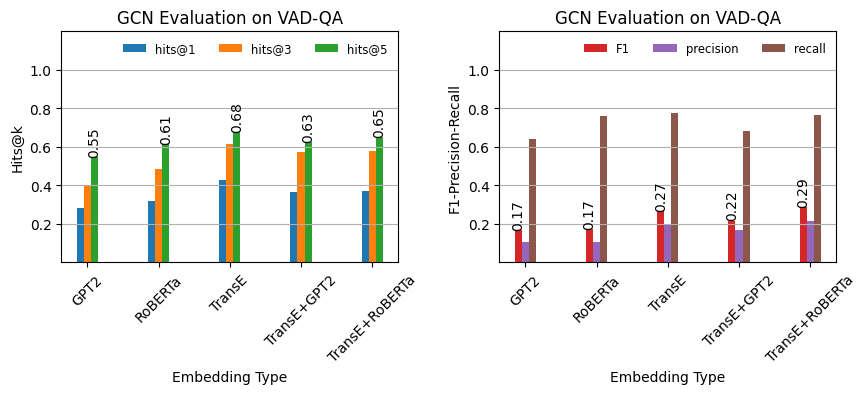

In [63]:
for dataset in VADQA_datasets:
    # Create a figure with two subplots
    subplot_size = (5, 3)  # Width x Height
    fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
    vadqa_bar_plot_func(gnn_model='GCN',
                        metric_type='Hits@k',
                        embedding_type=embedding_transe_combined,
                        dataset_type=dataset,
                        results=VAD_QA_results,subplot=gs[0])
    vadqa_bar_plot_func(gnn_model='GCN',
                        metric_type='F1-Precision-Recall',
                        embedding_type= embedding_transe_combined,
                        dataset_type=dataset,
                        results=VAD_QA_results,subplot=gs[1])
    #plt.tight_layout()
    plt.show()

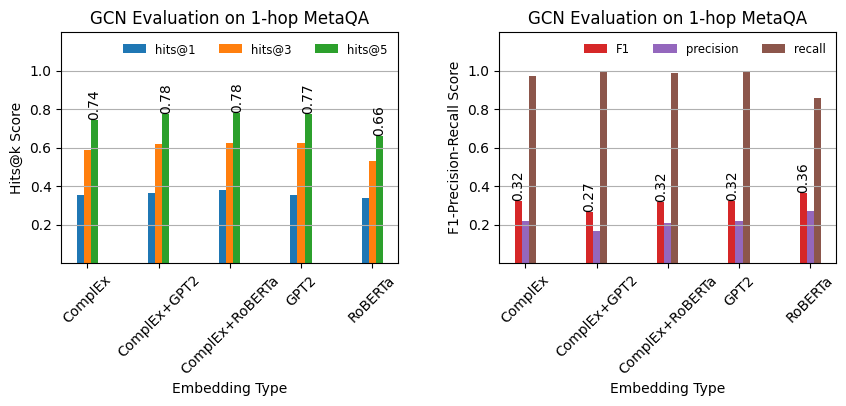

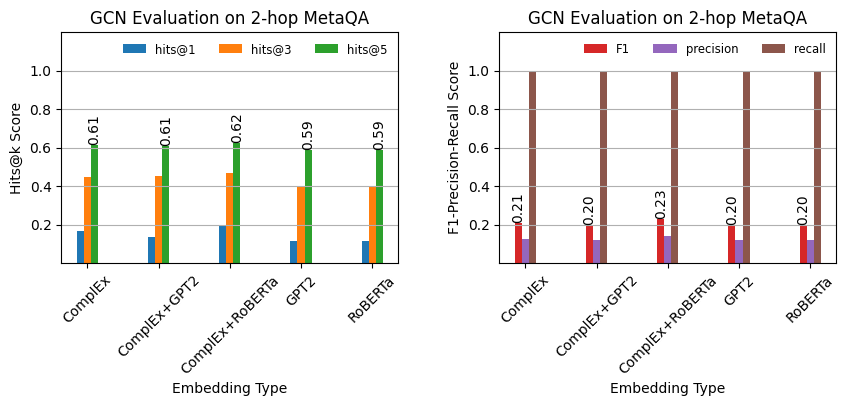

In [64]:
for dataset in MetaQA_datasets:
    # Create a figure with two subplots
    subplot_size = (5, 3)  # Width x Height
    fig = plt.figure(figsize=(subplot_size[0] * 2, subplot_size[1]))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
    metaqa_bar_plot_func(gnn_model='GCN',
                        metric_type='Hits@k',
                        embedding_type=embedding_complex_combined,
                        dataset_type=dataset,
                        results=MetaQA_exp_metadata,subplot=gs[0])
    metaqa_bar_plot_func(gnn_model='GCN',
                        metric_type='F1-Precision-Recall',
                        embedding_type= embedding_complex_combined,
                        dataset_type=dataset,
                        results=MetaQA_exp_metadata,subplot=gs[1])
    #plt.tight_layout()
    plt.show()

In [427]:
MetaQA_KG_EMBEDDINGS_PATH = {
    "complex":"./data/MetaQA/graph_embeddings/complex",
    "distmult":"./data/MetaQA/graph_embeddings/distmult",
    "transe":"./data/MetaQA/graph_embeddings/transe",
    "roberta":"./data/MetaQA/graph_embeddings/roberta",
    "gpt2":"./data/MetaQA/graph_embeddings/gpt2"
}

In [431]:
for kge_model in [k for k in MetaQA_KG_EMBEDDINGS_PATH.keys() if k != 'gpt2' and k !='roberta' ]:
    print(kge_model)

complex
distmult
transe


# Appendix 

All embeddings by each metric ofr each model

In [79]:
all_embeddings

{'complex': 'ComplEx',
 'distmult': 'DistMult',
 'transe': 'TransE',
 'roberta': 'RoBERTa',
 'gpt2': 'GPT2',
 'distmult+RoBERTa': 'DistMult+RoBERTa',
 'transe+RoBERTa': 'TransE+RoBERTa',
 'complex+RoBERTa': 'ComplEx+RoBERTa',
 'distmult+GPT2': 'DistMult+GPT2',
 'transe+GPT2': 'TransE+GPT2',
 'complex+GPT2': 'ComplEx+GPT2'}

## VAD

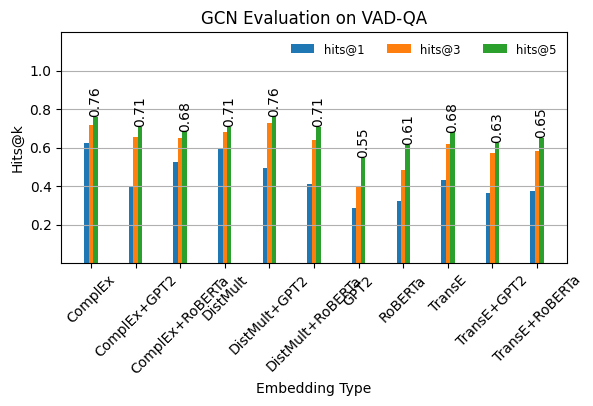

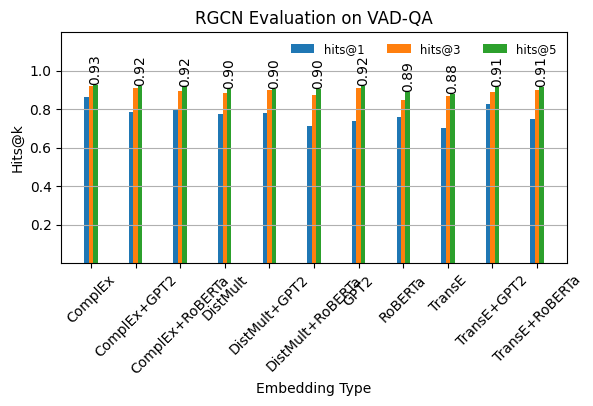

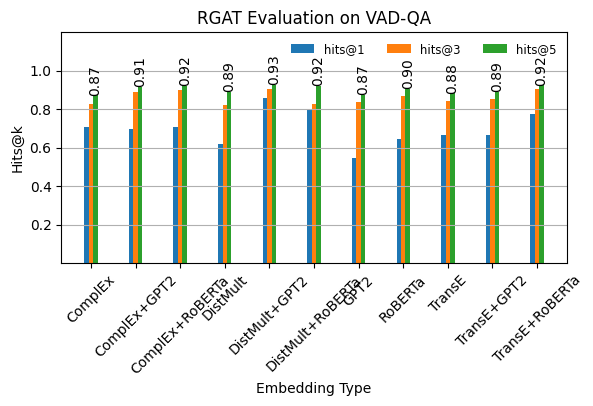

In [81]:
for dataset in VADQA_datasets:
        for model in gnn_models:

            # Create a figure with two subplots
            subplot_size = (15, 3)  # Width x Height
            fig = plt.figure(figsize=(subplot_size[0], subplot_size[1]))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
            vadqa_bar_plot_func(gnn_model = model, metric_type='Hits@k',
                                embedding_type= all_embeddings,
                                dataset_type=dataset,
                           results=VAD_QA_results,subplot=gs[0])
            #vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall', embedding_type= embedding_plain,dataset_type=dataset,
                           #results=VAD_QA_results,subplot=gs[1])
            #plt.tight_layout()
            plt.show()

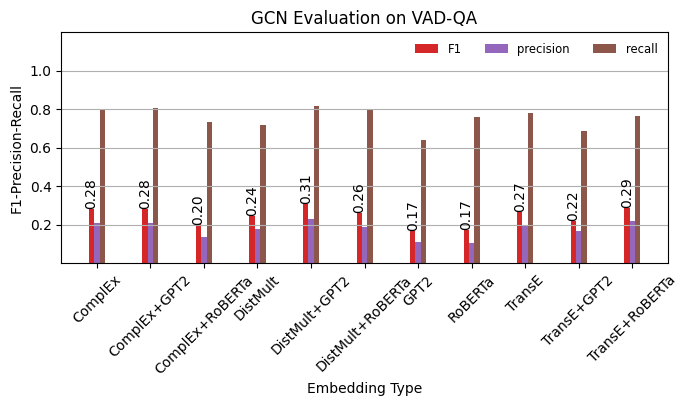

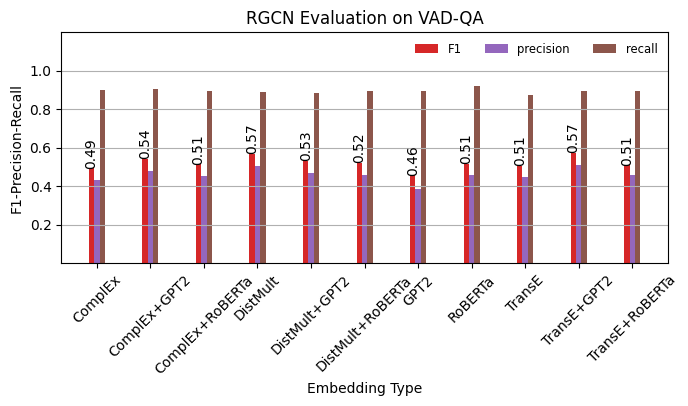

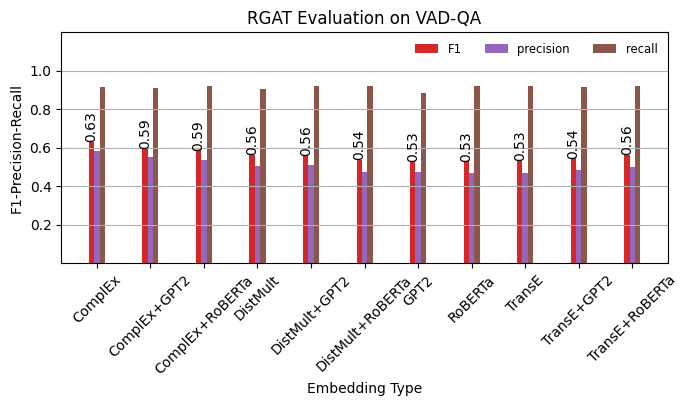

In [77]:
for dataset in VADQA_datasets:
        for model in gnn_models:

            # Create a figure with two subplots
            subplot_size = (18, 3)  # Width x Height
            fig = plt.figure(figsize=(subplot_size[0], subplot_size[1]))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
            vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall',
                                embedding_type= all_embeddings,
                                dataset_type=dataset,
                           results=VAD_QA_results,subplot=gs[0])
            #vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall', embedding_type= embedding_plain,dataset_type=dataset,
                           #results=VAD_QA_results,subplot=gs[1])
            #plt.tight_layout()
            plt.show()

## MetaQA

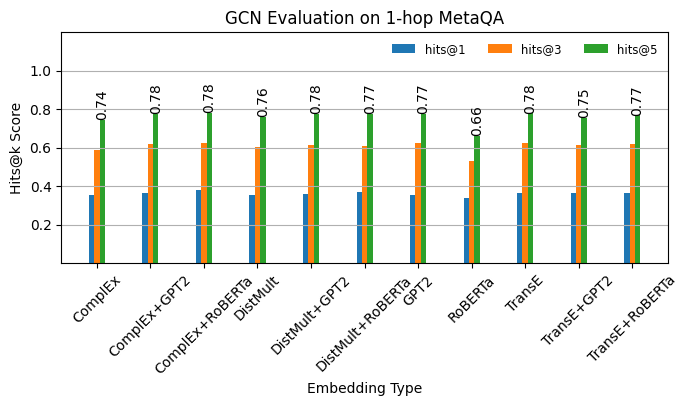

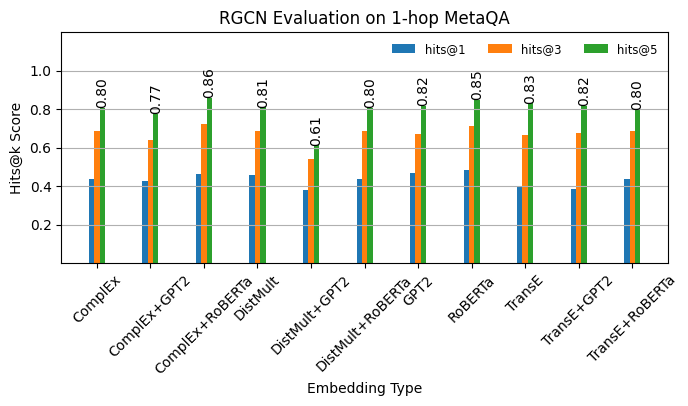

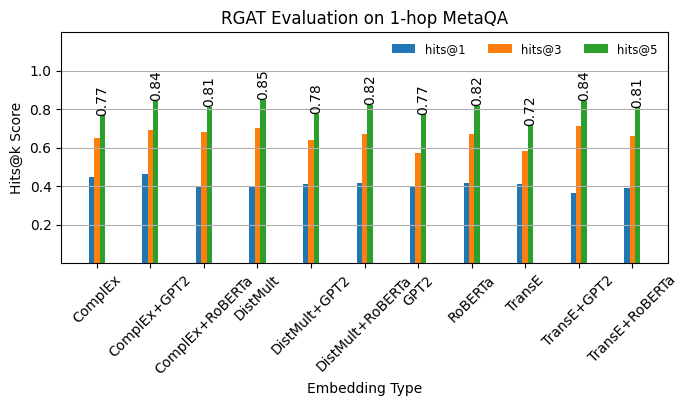

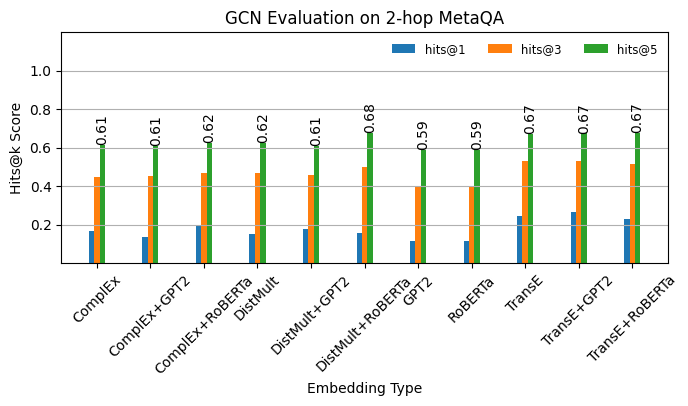

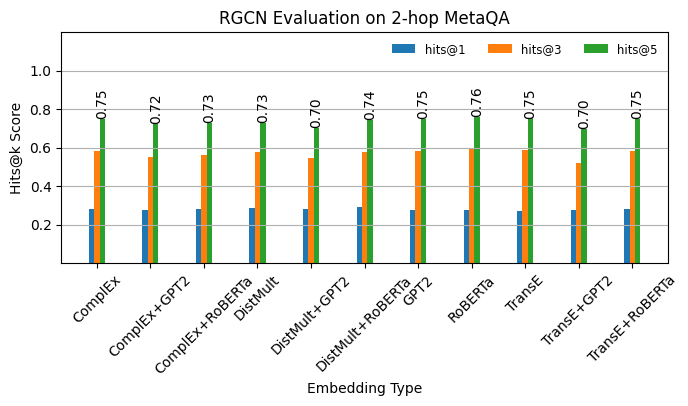

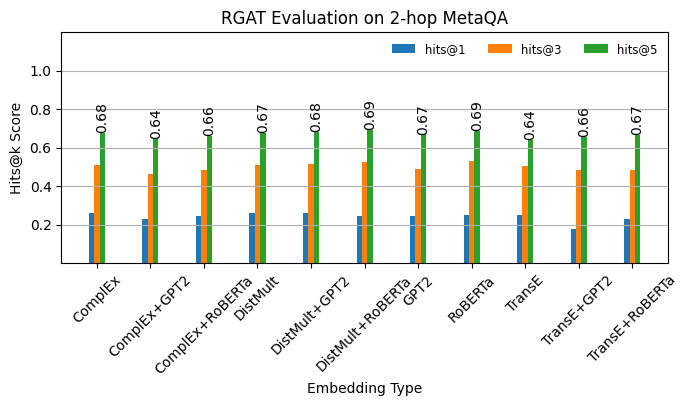

In [94]:
for dataset in MetaQA_datasets:
        for model in gnn_models:

            # Create a figure with two subplots
            subplot_size = (18, 3)  # Width x Height
            fig = plt.figure(figsize=(subplot_size[0], subplot_size[1]))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
            metaqa_bar_plot_func(gnn_model = model, metric_type='Hits@k',
                                embedding_type= all_embeddings,
                                dataset_type=dataset,
                           results=MetaQA_exp_metadata,subplot=gs[0])
            #vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall', embedding_type= embedding_plain,dataset_type=dataset,
                           #results=VAD_QA_results,subplot=gs[1])
            #plt.tight_layout()
            plt.show()

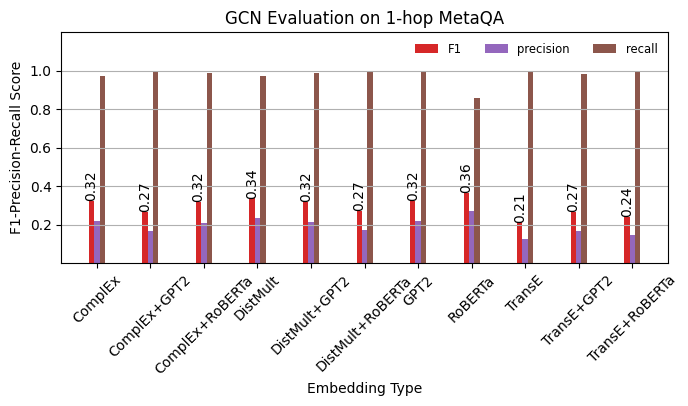

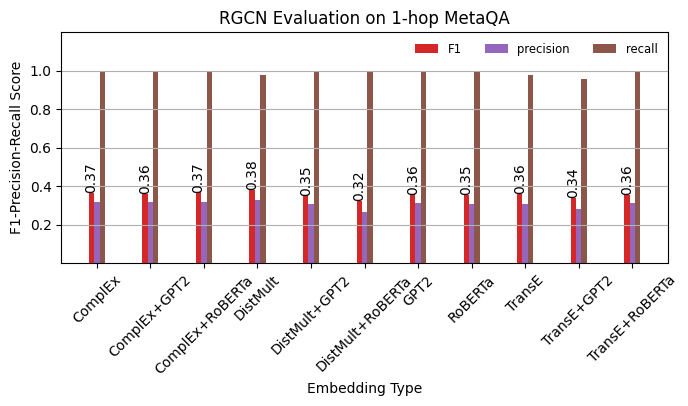

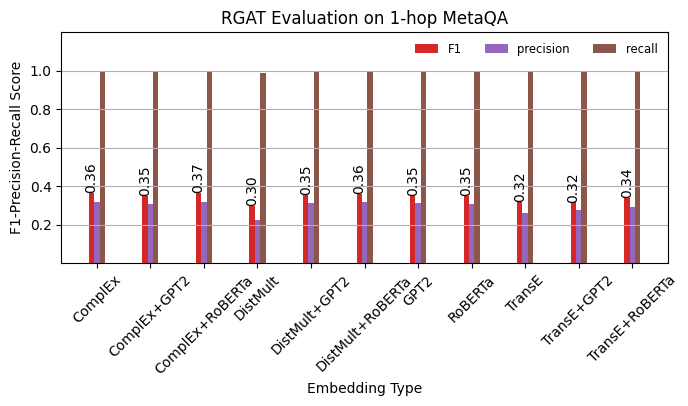

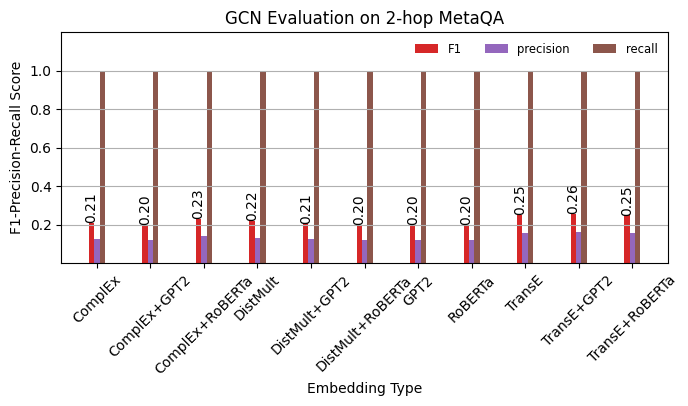

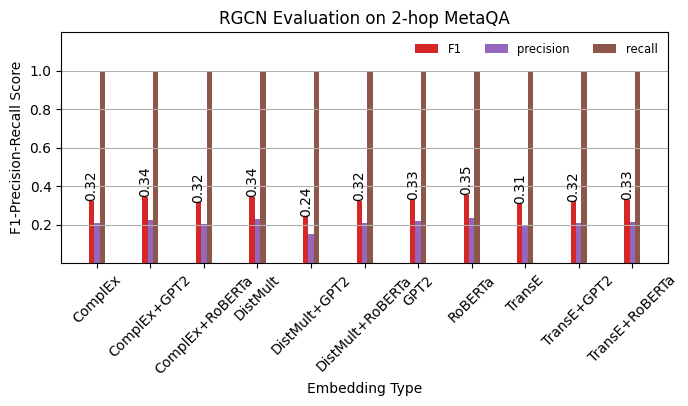

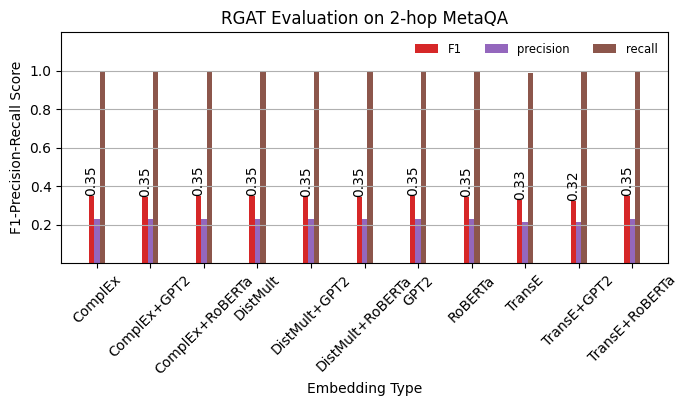

In [95]:


for dataset in MetaQA_datasets:
        for model in gnn_models:

            # Create a figure with two subplots
            subplot_size = (18, 3)  # Width x Height
            fig = plt.figure(figsize=(subplot_size[0], subplot_size[1]))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)
            metaqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall',
                                embedding_type= all_embeddings,
                                dataset_type=dataset,
                           results=MetaQA_exp_metadata,subplot=gs[0])
            #vadqa_bar_plot_func(gnn_model = model, metric_type='F1-Precision-Recall', embedding_type= embedding_plain,dataset_type=dataset,
                           #results=VAD_QA_results,subplot=gs[1])
            #plt.tight_layout()
            plt.show()

In [98]:
MetaQA_exp_metadata[(MetaQA_exp_metadata['model_name']=='RGAT') & (MetaQA_exp_metadata['dataset_type']=='2-hop')].tail(15)

,time_stamp,info,Epochs,Learning Rate,hidden_dimension,num_layers,num_bases,Model,F1,precision,...,triples_path,entities_labels_path,properties_labels_path,LM_embeddings_path,KG_embeddings_path,training_questions_concepts_answers_file_path,testing_questions_concepts_answers_file_path,dataset_type,model_name,embedding_type
28,2023:11:01 08:41:57,Task: 2-hop MetaQA with RGAT; node embeddings initialized with complex,5,0.01,16,3,NaN,"RGAT(\n (layers): ModuleList(\n (0): RGATConv(868, 16, heads=1)\n (1): ReLU()\n (2): Dropout(p=0.2, inplace=False)\n (3): RGATConv(16, 16, heads=1)\n (4): ReLU()\n (5): Dropout(p=0.2, inplace=False)\n (6): RGATConv(16, 2, heads=1)\n )\n)",0.347952,0.230412,...,./data/MetaQA/source_data/kb.txt,./data/MetaQA/source_data/kb_entities.csv,./data/MetaQA/source_data/kb_properties.txt,NaN,./data/MetaQA/graph_embeddings/complex,data/MetaQA/source_data/two-hop/qca_train.csv,data/MetaQA/source_data/two-hop/qca_test.csv,2-hop,RGAT,complex
29,2023:11:01 09:52:27,Task: 2-hop MetaQA with RGAT; node embeddings initialized with distmult,5,0.01,16,3,NaN,"RGAT(\n (layers): ModuleList(\n (0): RGATConv(868, 16, heads=1)\n (1): ReLU()\n (2): Dropout(p=0.2, inplace=False)\n (3): RGATConv(16, 16, heads=1)\n (4): ReLU()\n (5): Dropout(p=0.2, inplace=False)\n (6): RGATConv(16, 2, heads=1)\n )\n)",0.347405,0.230003,...,./data/MetaQA/source_data/kb.txt,./data/MetaQA/source_data/kb_entities.csv,./data/MetaQA/source_data/kb_properties.txt,NaN,./data/MetaQA/graph_embeddings/distmult,data/MetaQA/source_data/two-hop/qca_train.csv,data/MetaQA/source_data/two-hop/qca_test.csv,2-hop,RGAT,distmult
30,2023:11:01 11:03:24,Task: 2-hop MetaQA with RGAT; node embeddings initialized with transe,5,0.01,16,3,NaN,"RGAT(\n (layers): ModuleList(\n (0): RGATConv(868, 16, heads=1)\n (1): ReLU()\n (2): Dropout(p=0.2, inplace=False)\n (3): RGATConv(16, 16, heads=1)\n (4): ReLU()\n (5): Dropout(p=0.2, inplace=False)\n (6): RGATConv(16, 2, heads=1)\n )\n)",0.328547,0.215932,...,./data/MetaQA/source_data/kb.txt,./data/MetaQA/source_data/kb_entities.csv,./data/MetaQA/source_data/kb_properties.txt,NaN,./data/MetaQA/graph_embeddings/transe,data/MetaQA/source_data/two-hop/qca_train.csv,data/MetaQA/source_data/two-hop/qca_test.csv,2-hop,RGAT,transe
31,2023:11:01 12:17:52,Task: 2-hop MetaQA with RGAT; node embeddings initialized with roberta,5,0.01,16,3,NaN,"RGAT(\n (layers): ModuleList(\n (0): RGATConv(1536, 16, heads=1)\n (1): ReLU()\n (2): Dropout(p=0.2, inplace=False)\n (3): RGATConv(16, 16, heads=1)\n (4): ReLU()\n (5): Dropout(p=0.2, inplace=False)\n (6): RGATConv(16, 2, heads=1)\n )\n)",0.345455,0.228327,...,./data/MetaQA/source_data/kb.txt,./data/MetaQA/source_data/kb_entities.csv,./data/MetaQA/source_data/kb_properties.txt,NaN,./data/MetaQA/graph_embeddings/roberta,data/MetaQA/source_data/two-hop/qca_train.csv,data/MetaQA/source_data/two-hop/qca_test.csv,2-hop,RGAT,roberta
38,2023:11:02 07:29:58,Task: 2-hop MetaQA with RGAT; node embeddings initialized with complex+RoBERTa,5,0.01,16,3,NaN,"RGAT(\n (layers): ModuleList(\n (0): RGATConv(1636, 16, heads=1)\n (1): ReLU()\n (2): Dropout(p=0.2, inplace=False)\n (3): RGATConv(16, 16, heads=1)\n (4): ReLU()\n (5): Dropout(p=0.2, inplace=False)\n (6): RGATConv(16, 2, heads=1)\n )\n)",0.348407,0.230770,...,./data/MetaQA/source_data/kb.txt,./data/MetaQA/source_data/kb_entities.csv,./data/MetaQA/source_data/kb_properties.txt,./data/MetaQA/graph_embeddings/roberta,./data/MetaQA/graph_embeddings/complex,data/MetaQA/source_data/two-hop/qca_train.csv,data/MetaQA/source_data/two-hop/qca_test.csv,2-hop,RGAT,complex+RoBERTa
39,2023:11:02 08:50:12,Task: 2-hop MetaQA with RGAT; node embeddings initialized with distmult+RoBERTa,5,0.01,16,3,NaN,"RGAT(\n (layers): ModuleList(\n (0): RGATConv(1636, 16, heads=1)\n (1): ReLU()\n (2): Dropout(p=0.2, inplace=False)\n (3): RGATConv(16, 16, heads=1)\n (4): ReLU()\n (5): Dropout(p=0.2, inplace=False)\n (6): RGATConv(16, 2, heads=1)\n )\n)",0.345708,0.228559,...,./data/MetaQA/source_